In [ ]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
import numpy as np
import os

%matplotlib inline

def buildPolynomialModel(order=4):
    inputs = Input(shape=(order + 1, ))

    outputs = Dense(1, use_bias=False)(inputs)

    model = Model(inputs, outputs)

    model.compile(loss='mse', optimizer=SGD(0.01))

    model.summary()

    return model

def buildDataset(order = 4):
    x = np.random.uniform(0, 1, (50,1))
    inputs = []
    for i in range(0, order + 1):
        inputs.append(x ** i)

    inputs = np.concatenate(inputs, axis=-1)
    targets = np.sin(1 + x ** 2) + np.random.normal(0, 0.03, (50, 1))

    print(inputs.shape)
    print(targets.shape)
    return inputs, targets

def getOutput(weights):
    x_test = np.linspace(0, 1, 300)
    x_test = np.expand_dims(x_test, axis=1)

    x_feature = []
    for i in range(len(weights)):
        x_feature.append(x_test ** i)
    x_feature = np.concatenate(x_feature, axis=-1)

    y_test = np.sum(x_feature * np.expand_dims(weights, axis=0), axis=1)
    return y_test

def plotOutput(inputs, targets):
    x_test = np.linspace(0, 1, 300)
    x_test = np.expand_dims(x_test, axis=1)

    y_function = np.sin(1 + x_test ** 2)

    import matplotlib.pyplot as plt

    plt.ion()

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(inputs[:, 1], targets[:, 0], 'o')
    line, = ax.plot(x_test, y_function)
    line, = ax.plot(x_test, y_function)

    ax.set_ylim(0.8, 1.05)

    return fig, line



In [ ]:
order = 4
inputs, targets = buildDataset(order)


(50, 5)
(50, 1)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.lines.Line2D at 0x7a49381a1a20>)

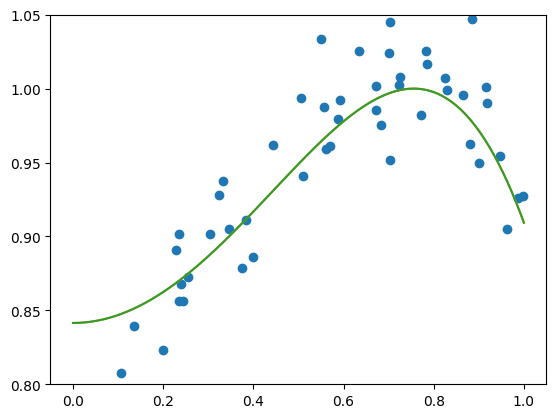

In [ ]:
plotOutput(inputs, targets)

(50, 5)
(50, 1)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
50/50 - 0s - loss: 0.2243 - 353ms/epoch - 7ms/step
50/50 - 0s - loss: 0.1056 - 105ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0743 - 110ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0554 - 107ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0426 - 75ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0340 - 78ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0277 - 71ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0236 - 73ms/epoch - 1ms/step
50/

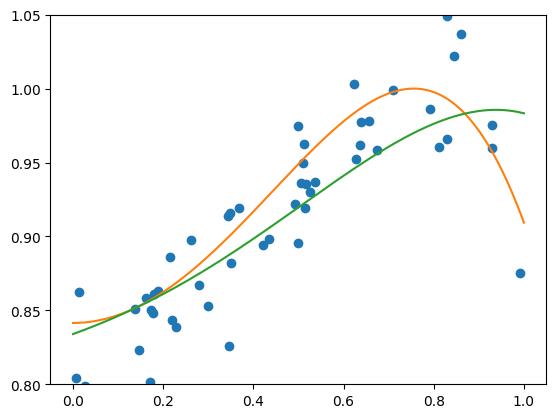

In [ ]:
def main():
    order = 4
    inputs, targets = buildDataset(order)
    # plotDataset(inputs, targets)

    model = buildPolynomialModel(order)

    fig, line = plotOutput(inputs, targets)
    fig.canvas.flush_events()

    num_epochs = 200
    # training models
    for epoch in range(num_epochs):
        model.fit(inputs, targets, batch_size=1, verbose=2)
        weights = model.get_layer('dense_1').get_weights()
        weights = np.squeeze(weights)
        line.set_ydata(getOutput(weights))
        fig.canvas.draw()
        fig.canvas.flush_events()

if __name__ == '__main__':
    main()

In [ ]:
model = buildPolynomialModel(order)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 100
# training models
for epoch in range(num_epochs):
    model.fit(inputs, targets, batch_size=1, verbose=2)


50/50 - 0s - loss: 0.4068 - 366ms/epoch - 7ms/step
50/50 - 0s - loss: 0.2436 - 100ms/epoch - 2ms/step
50/50 - 0s - loss: 0.1640 - 101ms/epoch - 2ms/step
50/50 - 0s - loss: 0.1114 - 103ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0757 - 109ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0517 - 96ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0353 - 107ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0248 - 111ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0173 - 128ms/epoch - 3ms/step
50/50 - 0s - loss: 0.0123 - 101ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0089 - 69ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0067 - 71ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0051 - 72ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0040 - 69ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0033 - 85ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0029 - 75ms/epoch - 2ms/step
50/50 - 0s - loss: 0.0025 - 69ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0023 - 71ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0021 - 72ms/epoch - 1ms/step
50/50 - 0s - loss: 0.0020 - 72ms/epoch - 

In [ ]:
weights = model.get_layer('dense').get_weights()
weights[0].reshape(-1)


array([ 8.6395395e-01, -5.3802156e-03,  3.5836455e-01,  6.4842083e-04,
       -2.4068411e-01], dtype=float32)

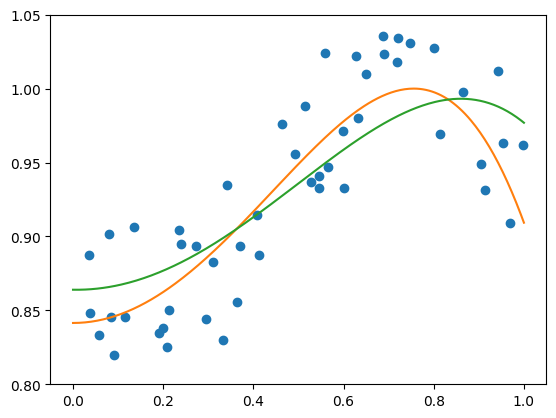

In [ ]:
fig, line = plotOutput(inputs, targets)
line.set_ydata(getOutput(weights[0].reshape(-1)))


In [ ]:
inputs.shape, targets.shape

((50, 5), (50, 1))

In [ ]:
import torch.nn as nn
class PolynomialModel(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.linear = nn.Linear(input_size, 10)
        self.l2 = nn.Linear(10, 7)
    def forward(self, x):
        x = self.linear(x)
        x = self.l2(x)
        x = nn.ReLU()(x)
        return x

model = PolynomialModel(5)



In [ ]:
class ConvNet(nn.Module)

In [ ]:
import torch
input = torch.randn(100, 5)

In [ ]:
out = model(input) # model.forward(input)

In [ ]:
input[1] , out[1]

(tensor([ 1.6769,  1.0440,  0.0925, -0.5026, -2.1504]),
 tensor([0.0000, 1.1457, 0.0000, 0.2714, 0.4515, 0.0000, 0.5378],
        grad_fn=<SelectBackward0>))

In [ ]:
(input[0] * model.linear.weight).sum() + model.linear.bias

tensor([-0.6876], grad_fn=<AddBackward0>)

In [ ]:
out.shape

torch.Size([100, 7])

In [ ]:
model.cuda()

PolynomialModel(
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
import torch
input = torch.randn(100, 5)
out = model(input.cuda())
out.cpu()

tensor([[ 0.5074],
        [ 0.8709],
        [-0.0739],
        [ 0.5526],
        [-0.3372],
        [-0.0881],
        [ 0.4385],
        [ 0.8747],
        [ 0.6586],
        [ 0.6034],
        [ 0.5641],
        [-0.0121],
        [ 0.3908],
        [-0.0165],
        [-0.2905],
        [ 0.1529],
        [ 1.0241],
        [-0.4625],
        [ 0.2145],
        [ 0.3013],
        [ 0.4882],
        [ 0.0764],
        [-0.0175],
        [ 0.0899],
        [ 0.5928],
        [ 0.6286],
        [ 0.2600],
        [-0.3800],
        [ 0.7361],
        [ 0.0116],
        [ 0.2054],
        [-0.6638],
        [ 0.1736],
        [ 0.5882],
        [ 0.6412],
        [ 0.9388],
        [ 0.6076],
        [-0.5652],
        [ 0.8842],
        [-0.0269],
        [ 0.0427],
        [-0.1613],
        [ 0.9762],
        [ 0.9028],
        [ 0.1780],
        [ 0.2126],
        [-0.0980],
        [-0.1338],
        [ 0.3849],
        [ 0.2813],
        [ 0.2840],
        [-0.3407],
        [ 0.

In [ ]:
import torch
import torch.optim as optim

input_batch = inputs[:5]
target_batch = targets[:5]
optimizer = optim.Adam(model.parameters(), lr=0.001)

output = model(torch.from_numpy(input_batch).float())
loss = nn.MSELoss() (output, torch.from_numpy(target_batch).float())
# output, target_batch, loss

optimizer.zero_grad()
loss.backward()


In [ ]:
model.linear.weight, model.linear.weight.grad

(Parameter containing:
 tensor([[-0.4299, -0.4099,  0.3630,  0.2943, -0.2917]], requires_grad=True),
 tensor([[-2.0798, -1.0340, -0.5662, -0.3257, -0.1924]]))

In [ ]:
((output-torch.from_numpy(target_batch).float())**2).mean()

tensor(1.0875, grad_fn=<MeanBackward0>)